<a href="https://colab.research.google.com/github/wordsbyanmol/PUS2024_AArora/blob/main/Endterm_2024Nov24_PartIII_aa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import drive
from google.colab import drive
drive.mount('/content/drive')
city_agg = pd.read_csv('/content/drive/My Drive/city_agg.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#show data
city_agg

,damagedCity,disasterNumber,grossIncome_scaled,specialNeeds,ownRent,residenceType,householdComposition,ppfvl_scaled,homeOwnersInsurance,floodInsurance,damagedZipCode
0,A,1,-0.064922,0.000000,0.750000,Townhouse,1,-0.256310,0.250000,0.000000,610.0
1,A CATORCE CALLE TIAGOSAN,1,-0.048956,0.000000,1.000000,Townhouse,3,-0.256310,0.000000,0.000000,957.0
2,A COLA,1,0.003583,0.000000,1.000000,House/Duplex,2,-0.256310,1.000000,0.000000,77583.0
3,A RECIBO,1,-0.048956,0.000000,0.000000,House/Duplex,3,-0.256310,0.000000,0.000000,612.0
4,ABAJO NARANJITO,1,-0.048956,0.000000,1.000000,House/Duplex,4,-0.256310,0.000000,0.000000,719.0
...,...,...,...,...,...,...,...,...,...,...,...
9866,ZOLFO,1,-0.040914,0.000000,0.333333,Other,1,-0.256310,0.000000,0.000000,33890.0
9867,ZOLFO SPRING,1,-0.050305,0.000000,1.000000,Other,1,-0.256310,0.000000,0.000000,33890.0
9868,ZOLFO SPRINGS,1,0.028077,0.017045,0.718182,House/Duplex,1,-0.092257,0.379545,0.028409,33890.0
9869,ZUNEDIN,1,-0.062520,0.000000,0.000000,Apartment,4,-0.256310,0.000000,0.000000,34698.0


In [ ]:
#descriptive stats for city revised data
describe = city_agg.describe().T
zero_val_cnt = (city_agg == 0).sum()
describe['zero_val %'] = (zero_val_cnt / city_agg.shape[0])*100
describe['missing %'] = 100 - (describe['count'] / city_agg.shape[0])*100
describe.style.format("{:.3f}")

,count,mean,std,min,25%,50%,75%,max,zero_val %,missing %
disasterNumber,9871.000,1.168,0.459,1.000,1.000,1.000,1.000,6.000,0.000,0.000
grossIncome_scaled,9871.000,-0.002,0.579,-0.095,-0.067,-0.049,-0.023,31.624,0.000,0.000
specialNeeds,9871.000,0.046,0.148,0.000,0.000,0.000,0.016,1.000,72.921,0.000
ownRent,9871.000,0.630,0.391,0.000,0.333,0.745,1.000,1.000,22.136,0.000
householdComposition,9871.000,1.713,1.109,1.000,1.000,1.000,2.000,11.000,0.000,0.000
ppfvl_scaled,9871.000,0.005,0.779,-0.256,-0.256,-0.256,-0.110,10.023,0.000,0.000
homeOwnersInsurance,9871.000,0.228,0.324,0.000,0.000,0.000,0.378,1.000,54.331,0.000
floodInsurance,9871.000,0.046,0.158,0.000,0.000,0.000,0.000,1.000,76.497,0.000
damagedZipCode,9871.000,29750.834,30557.003,0.000,757.000,29545.000,70124.500,90020.000,0.051,0.000


In [ ]:
#only keep rows where gross income is greater than 0
city_agg = city_agg[city_agg['grossIncome_scaled'] > 0]

 Logarithms (like we do later with grossIncome_log), might encounter errors or produce undefined results when dealing with zero or negative values.

In [ ]:
city_agg

,damagedCity,disasterNumber,grossIncome_scaled,specialNeeds,ownRent,residenceType,householdComposition,ppfvl_scaled,homeOwnersInsurance,floodInsurance,damagedZipCode
2,A COLA,1,0.003583,0.000000,1.000000,House/Duplex,2,-0.256310,1.000000,0.000000,77583.0
12,ABILENE,2,0.028280,0.180617,0.549559,House/Duplex,1,-0.151562,0.261013,0.008811,79603.0
14,ABITA SPRINGS,2,0.041224,0.000000,0.701826,House/Duplex,1,-0.185659,0.582192,0.259361,70420.0
16,ABRA HONDA CAMUY,1,2.599203,0.000000,1.000000,House/Duplex,1,-0.256310,0.000000,0.000000,627.0
19,ACERIBO,1,0.003583,0.000000,0.000000,House/Duplex,1,-0.256310,0.000000,0.000000,612.0
...,...,...,...,...,...,...,...,...,...,...,...
9844,YUCO,1,1.721777,0.000000,0.333333,House/Duplex,1,0.029172,0.000000,0.000000,698.0
9845,YULEE,2,0.051476,0.020510,0.680710,House/Duplex,1,-0.220517,0.445676,0.051552,32097.0
9859,ZEPHYR,1,1.790443,0.428571,0.857143,House/Duplex,1,-0.256310,0.428571,0.000000,76890.0
9862,ZEPHYRHILLS,2,0.002461,0.019324,0.532947,House/Duplex,1,-0.225672,0.273623,0.020097,33542.0


In [ ]:
#descriptive stats for city agg data
describe = city_agg.describe().T
zero_val_cnt = (city_agg == 0).sum()
describe['zero_val %'] = (zero_val_cnt / city_agg.shape[0])*100
describe['missing %'] = 100 - (describe['count'] / city_agg.shape[0])*100
describe.style.format("{:.3f}")

,count,mean,std,min,25%,50%,75%,max,zero_val %,missing %
disasterNumber,1552.000,1.353,0.616,1.000,1.000,1.000,2.000,5.000,0.000,0.000
grossIncome_scaled,1552.000,0.272,1.429,0.000,0.014,0.036,0.087,31.624,0.000,0.000
specialNeeds,1552.000,0.043,0.108,0.000,0.000,0.008,0.035,1.000,47.809,0.000
ownRent,1552.000,0.713,0.280,0.000,0.582,0.739,1.000,1.000,7.216,0.000
householdComposition,1552.000,1.651,1.053,1.000,1.000,1.000,2.000,11.000,0.000,0.000
ppfvl_scaled,1552.000,-0.083,0.486,-0.256,-0.256,-0.235,-0.131,6.006,0.000,0.000
homeOwnersInsurance,1552.000,0.451,0.329,0.000,0.245,0.429,0.626,1.000,19.845,0.000
floodInsurance,1552.000,0.111,0.218,0.000,0.000,0.011,0.110,1.000,45.361,0.000
damagedZipCode,1552.000,43992.411,27643.572,0.000,32100.750,33811.000,75790.000,79830.000,0.064,0.000


In [ ]:
#SHOW NAN VALUES IN CITY_AGG
city_agg.isna().sum()

,0
damagedCity,0
disasterNumber,0
grossIncome_scaled,0
specialNeeds,0
ownRent,0
residenceType,0
householdComposition,0
ppfvl_scaled,0
homeOwnersInsurance,0
floodInsurance,0


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# For grossIncome_scaled
city_agg['grossIncome_scaled'] = city_agg['grossIncome_scaled'].replace(0, 1e-10)

<ipython-input-70-61845c6b5349>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_agg['grossIncome_scaled'] = city_agg['grossIncome_scaled'].replace(0, 1e-10)


In [ ]:
# Replace NaN with a small positive value and negative values with 0 or 1
city_agg['grossIncome_scaled'] = city_agg['grossIncome_scaled'].fillna(1e-10)  # Replace NaN with a small value
city_agg['grossIncome_scaled'] = city_agg['grossIncome_scaled'].clip(lower=1e-10)  # Clip values to a minimum of 1e-10

<ipython-input-71-5c1104b8537d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_agg['grossIncome_scaled'] = city_agg['grossIncome_scaled'].fillna(1e-10)  # Replace NaN with a small value
<ipython-input-71-5c1104b8537d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_agg['grossIncome_scaled'] = city_agg['grossIncome_scaled'].clip(lower=1e-10)  # Clip values to a minimum of 1e-10


In [ ]:
#perform log operation
city_agg['grossIncome_log'] = np.log(city_agg['grossIncome_scaled'])

<ipython-input-72-f34203ebea57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_agg['grossIncome_log'] = np.log(city_agg['grossIncome_scaled'])


It addresses the likely skewness of your income data after it has been scaled, making it more suitable for the K-Means clustering algorithm you use later in your analysis.

In [ ]:
# Step 1: Replace NaNs in 'ppfvl_scaled' with a small positive value
# This avoids taking the log of 0 directly
city_agg['ppfvl_scaled'] = city_agg['ppfvl_scaled'].fillna(1e-10)  # Replace with a small positive value

# Step 2 & 3 combined: Apply log transformation with NumPy's log1p
# log1p(x) calculates log(1 + x), handling 0 gracefully
city_agg['ppfvl_log'] = np.log1p(city_agg['ppfvl_scaled'])

<ipython-input-73-d2537326ccd8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_agg['ppfvl_scaled'] = city_agg['ppfvl_scaled'].fillna(1e-10)  # Replace with a small positive value
<ipython-input-73-d2537326ccd8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_agg['ppfvl_log'] = np.log1p(city_agg['ppfvl_scaled'])


Logarithms are undefined for zero and negative values. By using a small positive value, we avoid errors during the log transformation. .It addresses the likely skewness of your ppfvl data after it has been scaled, making it more suitable for the K-Means clustering algorithm you use later in your analysis.

In [ ]:
#show data
city_agg

,damagedCity,disasterNumber,grossIncome_scaled,specialNeeds,ownRent,residenceType,householdComposition,ppfvl_scaled,homeOwnersInsurance,floodInsurance,damagedZipCode,grossIncome_log,ppfvl_log
2,A COLA,1,0.003583,0.000000,1.000000,House/Duplex,2,-0.256310,1.000000,0.000000,77583.0,-5.631473,-0.296131
12,ABILENE,2,0.028280,0.180617,0.549559,House/Duplex,1,-0.151562,0.261013,0.008811,79603.0,-3.565598,-0.164359
14,ABITA SPRINGS,2,0.041224,0.000000,0.701826,House/Duplex,1,-0.185659,0.582192,0.259361,70420.0,-3.188726,-0.205376
16,ABRA HONDA CAMUY,1,2.599203,0.000000,1.000000,House/Duplex,1,-0.256310,0.000000,0.000000,627.0,0.955205,-0.296131
19,ACERIBO,1,0.003583,0.000000,0.000000,House/Duplex,1,-0.256310,0.000000,0.000000,612.0,-5.631473,-0.296131
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9844,YUCO,1,1.721777,0.000000,0.333333,House/Duplex,1,0.029172,0.000000,0.000000,698.0,0.543357,0.028755
9845,YULEE,2,0.051476,0.020510,0.680710,House/Duplex,1,-0.220517,0.445676,0.051552,32097.0,-2.966644,-0.249125
9859,ZEPHYR,1,1.790443,0.428571,0.857143,House/Duplex,1,-0.256310,0.428571,0.000000,76890.0,0.582463,-0.296131
9862,ZEPHYRHILLS,2,0.002461,0.019324,0.532947,House/Duplex,1,-0.225672,0.273623,0.020097,33542.0,-6.007297,-0.255760


In [ ]:
city_agg['residenceType']. unique()

array(['House/Duplex', 'Apartment', 'Townhouse', 'Mobile Home', 'Condo',
       'Other', 'Boat', 'Military Housing', 'Travel Trailer',
       'College Dorm'], dtype=object)

In [ ]:
#show data type
city_agg.dtypes

,0
damagedCity,object
disasterNumber,int64
grossIncome_scaled,float64
specialNeeds,float64
ownRent,float64
residenceType,object
householdComposition,int64
ppfvl_scaled,float64
homeOwnersInsurance,float64
floodInsurance,float64


In [ ]:
#  'residenceType' column contains categorical data
# Create dummy variables for the 'residenceType' column
residence_type_dummies = pd.get_dummies(city_agg['residenceType'], prefix='residenceType')

# Concatenate the dummy variables to your original DataFrame
city_agg = pd.concat([city_agg, residence_type_dummies], axis=1)

# Include all dummy columns generated by pd.get_dummies
X = city_agg[['grossIncome_log', 'specialNeeds' ,'disasterNumber', 'ppfvl_log', 'homeOwnersInsurance', 'floodInsurance'] + list(residence_type_dummies.columns)]

In [ ]:
#showdata
X

,grossIncome_log,specialNeeds,disasterNumber,ppfvl_log,homeOwnersInsurance,floodInsurance,residenceType_Apartment,residenceType_Boat,residenceType_College Dorm,residenceType_Condo,residenceType_House/Duplex,residenceType_Military Housing,residenceType_Mobile Home,residenceType_Other,residenceType_Townhouse,residenceType_Travel Trailer
2,-5.631473,0.000000,1,-0.296131,1.000000,0.000000,False,False,False,False,True,False,False,False,False,False
12,-3.565598,0.180617,2,-0.164359,0.261013,0.008811,False,False,False,False,True,False,False,False,False,False
14,-3.188726,0.000000,2,-0.205376,0.582192,0.259361,False,False,False,False,True,False,False,False,False,False
16,0.955205,0.000000,1,-0.296131,0.000000,0.000000,False,False,False,False,True,False,False,False,False,False
19,-5.631473,0.000000,1,-0.296131,0.000000,0.000000,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9844,0.543357,0.000000,1,0.028755,0.000000,0.000000,False,False,False,False,True,False,False,False,False,False
9845,-2.966644,0.020510,2,-0.249125,0.445676,0.051552,False,False,False,False,True,False,False,False,False,False
9859,0.582463,0.428571,1,-0.296131,0.428571,0.000000,False,False,False,False,True,False,False,False,False,False
9862,-6.007297,0.019324,2,-0.255760,0.273623,0.020097,False,False,False,False,True,False,False,False,False,False


In [ ]:
# Select features for clustering, excluding 'residenceType' and including dummies instead
X = city_agg[['grossIncome_log', 'specialNeeds' ,'disasterNumber', 'ppfvl_log', 'homeOwnersInsurance', 'floodInsurance'] + list(residence_type_dummies.columns)]

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or other strategies like 'median', 'most_frequent'
X_imputed = imputer.fit_transform(X)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed) # Fit and transform on the entire data

# Assuming 'best_k' is the optimal number of clusters from the elbow method
best_k = 7

# Initialize and fit the KMeans model with the best_k
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X_scaled)

# Get cluster assignments for each data point
city_agg['cluster'] = kmeans.labels_

# Now, 'city_agg' DataFrame has a new 'cluster' column indicating the assigned cluster for each data point.

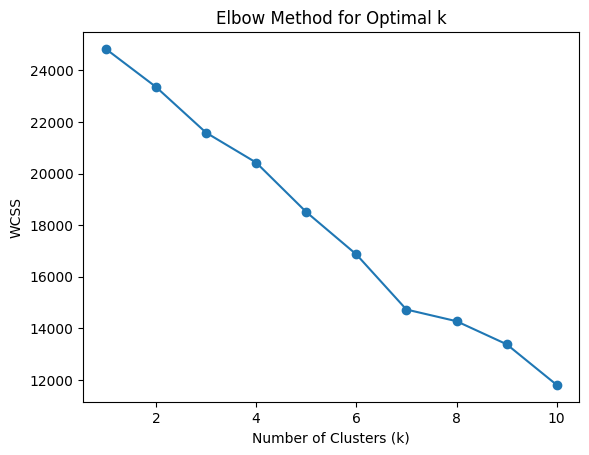

In [ ]:
# Assuming X_scaled is your scaled data
wcss = []  # Within-cluster sum of squares

# Try different numbers of clusters (e.g., 1 to 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

The elbow curve shows that post 7 there isn't a significant decrease in variance. Thus, seven is a good starting point for KMeans clustering.

In [ ]:
# Select features for clustering, excluding 'residenceType' and including dummies instead
X = city_agg[['grossIncome_log', 'specialNeeds' ,'disasterNumber', 'ppfvl_log', 'homeOwnersInsurance', 'floodInsurance'] + list(residence_type_dummies.columns)]

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or other strategies like 'median', 'most_frequent'
X_imputed = imputer.fit_transform(X)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed) # Fit and transform on the entire data

# Assuming 'best_k' is the optimal number of clusters from the elbow method
best_k = 7

# Initialize and fit the KMeans model with the best_k
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X_scaled)

# Get cluster assignments for each data point
city_agg['cluster'] = kmeans.labels_

# Now, 'city_agg' DataFrame has a new 'cluster' column indicating the assigned cluster for each data point.

In [ ]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Calculate Davies-Bouldin index
db_index = davies_bouldin_score(X_scaled, kmeans.labels_)

# Calculate Calinski-Harabasz index
ch_index = calinski_harabasz_score(X_scaled, kmeans.labels_)

#show score
print(f"Davies-Bouldin Index: {db_index}")
print(f"Calinski-Harabasz Index: {ch_index}")

Davies-Bouldin Index: 1.3762900773773086
Calinski-Harabasz Index: 176.75443388682672


The two scores provide somewhat conflicting information. The Davies-Bouldin index suggests some overlap between clusters, while the Calinski-Harabasz index suggests good cluster separation.

The Davies-Bouldin index measures the average similarity between each cluster and its most similar cluster. Lower scores indicate better clustering. A score of 1.37 suggests that there is some overlap or ambiguity between clusters.

The Calinski-Harabasz index measures the ratio of between-cluster variance to within-cluster variance. Higher scores indicate better clustering. A score of 176.754 is relatively high, suggesting that the clusters are relatively well-separated and have good internal cohesion.

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.1269385549271236


The Silhouette Score of 0.321 indicates that there is room for improvement in the clustering. It suggests that some data points are not strongly associated with their assigned clusters and there might be some ambiguity in the cluster assignments.

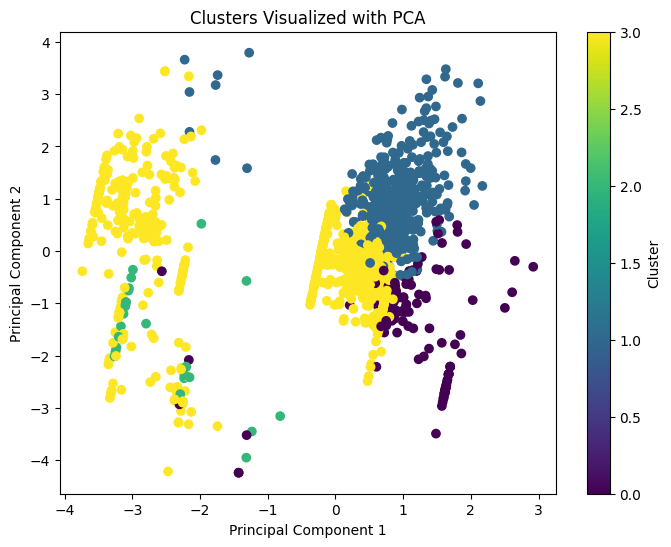

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Add the cluster assignments to the DataFrame
principalDf['cluster'] = kmeans.labels_

# Plot the clusters in 2D
plt.figure(figsize=(8, 6))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=principalDf['cluster'], cmap='viridis')
plt.title('Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

The analysis shows cluster 4,5 and 6 are more sscatterd whereas the other clusters are more tightly packed. The variance within these clusters is larger, suggesting higher heterogeneity in these groups.

The remaining clusters seem more compact, indicating: Strong similarity among the features of data points within these clusters.
The clustering algorithm has successfully grouped similar data points.

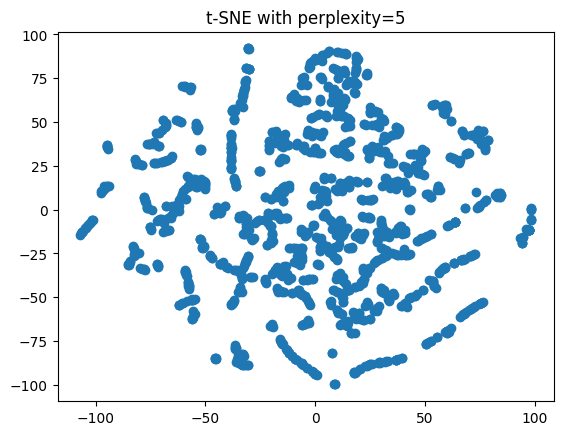

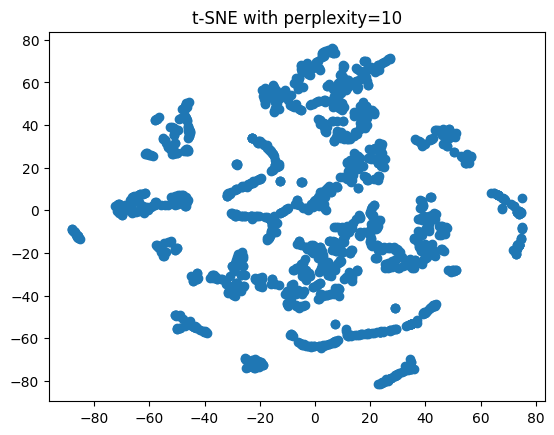

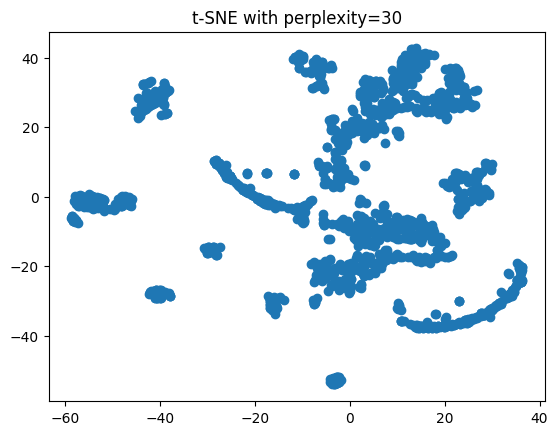

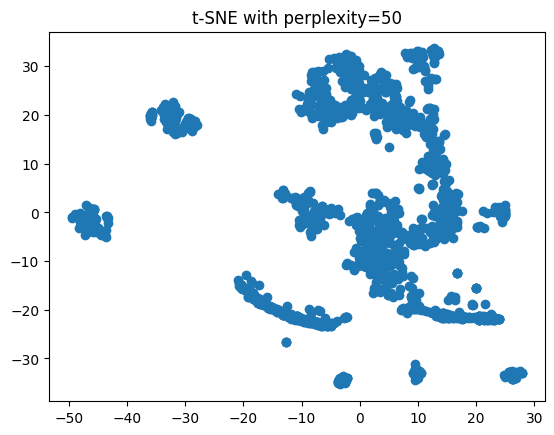

In [ ]:
from sklearn.manifold import TSNE

for perplexity in [5, 10, 30, 50]:  # Test different values. Was [5, 30, 50]
    # Only proceed if perplexity is less than number of samples.
    if perplexity < X_scaled.shape[0]:
        tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
        X_tsne = tsne.fit_transform(X_scaled)
        plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
        plt.title(f't-SNE with perplexity={perplexity}')
        plt.show()
    else:
        print(f"Skipping perplexity {perplexity} as it's greater than or equal to the number of samples ({X_scaled.shape[0]})")

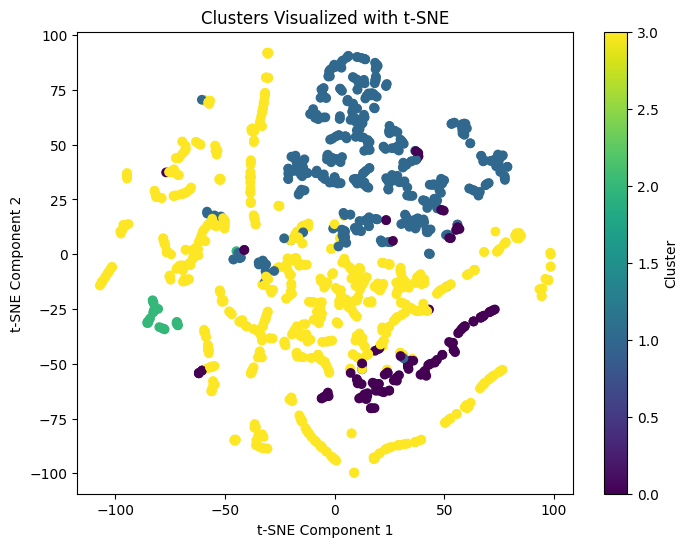

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE for dimensionality reduction to 2 components
# Set perplexity to a value less than the number of samples (10 in this case)
tsne = TSNE(n_components=2, random_state=42, perplexity=5)  # Initialize t-SNE with adjusted perplexity
X_tsne = tsne.fit_transform(X_scaled)  # Apply t-SNE to scaled data

# Create a DataFrame with the t-SNE components and cluster assignments
tsne_df = pd.DataFrame(data=X_tsne, columns=['t-SNE component 1', 't-SNE component 2'])
tsne_df['cluster'] = kmeans.labels_

# Plot the clusters in 2D using t-SNE components
plt.figure(figsize=(8, 6))
plt.scatter(tsne_df['t-SNE component 1'], tsne_df['t-SNE component 2'], c=tsne_df['cluster'], cmap='viridis')
plt.title('Clusters Visualized with t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()

Cluster Separation: The clusters appear to be relatively well-separated, indicating that the clustering algorithm has done a good job of grouping similar data points together.
Cluster Density: Some clusters appear denser than others, suggesting variations in the density of data points within each cluster.
Outliers: There might be some outlier points that are distant from the main clusters. These could be interesting cases to investigate further.

In [ ]:
# 1. Calculate average ppfvl_scaled for each city within each cluster
heatmap_data = city_agg.groupby(['cluster', 'damagedCity'])['ppfvl_scaled'].mean().reset_index()

# 2. Get the top 5 cities per cluster based on average ppfvl_scaled
top_3_cities_per_cluster = heatmap_data.groupby('cluster').apply(lambda x: x.nlargest(3, 'ppfvl_scaled')).reset_index(drop=True)

# 3. Create the pivot table
pivot_table = pd.pivot_table(
    top_3_cities_per_cluster,
    values='ppfvl_scaled',
    index='damagedCity',  # Cities as rows
    columns='cluster',    # Clusters as columns
    aggfunc='mean',       # Average ppfvl_scaled as values
    fill_value=0          # Fill missing values with 0
)

# Display the pivot table
print(pivot_table)

cluster                  0         1         2         3
damagedCity                                             
AGUADOLLA         0.000000  0.000000 -0.256310  0.000000
BEVIL OAKS        0.000000  4.736470  0.000000  0.000000
HANKAME           6.005543  0.000000  0.000000  0.000000
HOUSTOM           0.000000  0.000000  0.844362  0.000000
IAVNHOE           2.969637  0.000000  0.000000  0.000000
KEY WES           0.000000  0.000000  0.000000  1.507510
MARATHON KEY      0.000000  0.000000  0.000000  1.507510
MOROCIS           0.000000  0.000000  5.258696  0.000000
PINEWOOD ESTATES  0.000000  4.891394  0.000000  0.000000
PLANO E           0.000000  0.000000  0.000000  0.905644
ROSE HILL ACRES   0.000000  5.692650  0.000000  0.000000
WOODLOCH          1.361321  0.000000  0.000000  0.000000


<ipython-input-87-e58b7d500542>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_cities_per_cluster = heatmap_data.groupby('cluster').apply(lambda x: x.nlargest(3, 'ppfvl_scaled')).reset_index(drop=True)


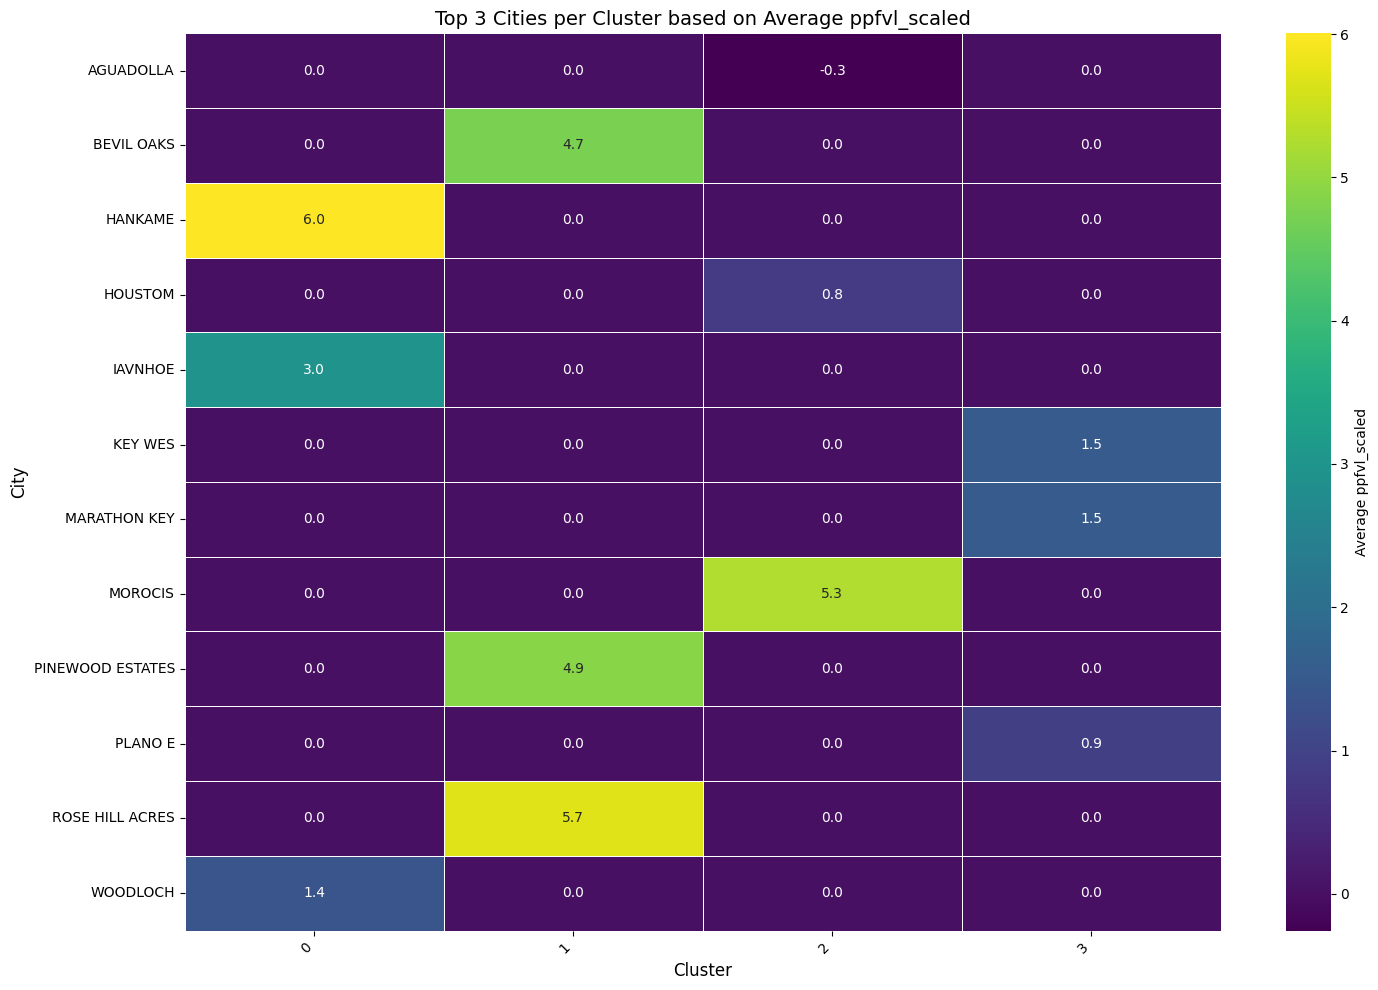

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'pivot_table' is the pivot table from the previous step

# Plot the heatmap
plt.figure(figsize=(15, 10))  # Adjust figure size as needed
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".1f", linewidths=0.5, cbar_kws={'label': 'Average ppfvl_scaled'})
plt.title('Top 3 Cities per Cluster based on Average ppfvl_scaled', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Purpose of the Heatmap:

This visual highlights the cities with the highest values of ppfvl_scaled within each cluster.
The intensity of the color (from dark purple to bright yellow) represents the value of ppfvl_scaled.
Higher Values:

Bright yellow and green cells indicate cities with higher ppfvl_scaled values.
For example:
Hankame in Cluster 0 (Value: 6.0).
Rose Hill Acres in Cluster 2 (Value: 5.7).
Morocis in Cluster 4 (Value: 5.3).
Lower Values:

Purple and darker cells represent lower or negative values.
Cities such as Indian Shores (Cluster 5: -0.2) and Aransan Pans (Clusters 0 and 6: -0.3) consistently show lower values. Clusters 0 and 2 contain cities with some of the highest values, indicating that these clusters may have characteristics favoring high ppfvl_scaled.
Lower values are sparsely distributed and mostly found in clusters 5 and 6.

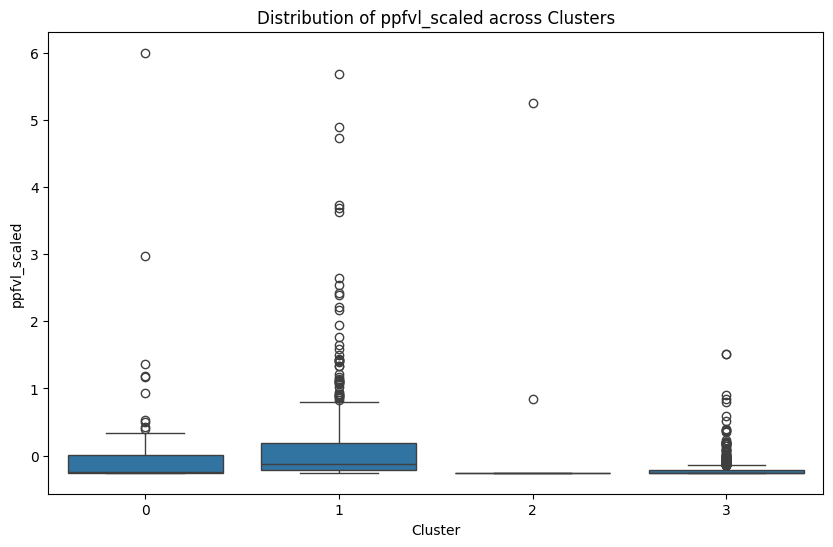

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for 'ppfvl_scaled' or other relevant features across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='ppfvl_scaled', data=city_agg)
plt.title('Distribution of ppfvl_scaled across Clusters')
plt.xlabel('Cluster')
plt.ylabel('ppfvl_scaled')
plt.show()

Overall, the box plot suggests that the ppfvl_scaled values vary significantly across different clusters. Some clusters have higher median values and more variability, while others have lower medians and less variability.

Cluster 0:

Has a relatively low median compared to other clusters.
The data points are tightly clustered around the median, indicating low variability.
There are some outliers on the higher end.
Cluster 1:

Similar to Cluster 0, but with a slightly higher median.
The data is more spread out, with a larger interquartile range.

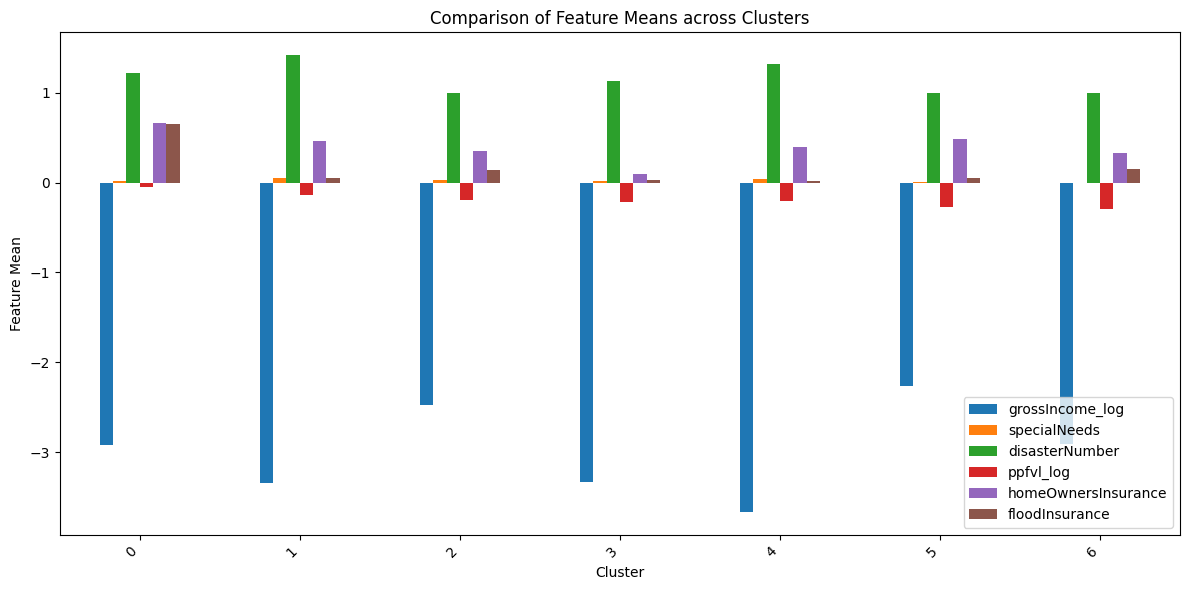

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ... (your existing code) ...

# Create bar charts for comparing feature means across clusters
cluster_means.plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Feature Means across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Feature Mean')
plt.xticks(rotation=45, ha='right')

# Shift legend to bottom right
plt.legend(loc='lower right')  # Change loc to 'lower right'

plt.tight_layout()
plt.show()

Cluster 4 and 5: Slightly higher means for insurance coverage, suggesting more resources or policies promoting preparedness in these regions.
Cluster 0 and 1: Exhibit relatively lower values for features like ppfvl_log, implying lower damage or recovery-related parameters.